## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import numpy as np
import optuna
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import re
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()

In [3]:
train = pd.read_csv("train_dataset_train.csv")
test = pd.read_csv("test_dataset_test.csv")

In [4]:
train['index_oper']=train['index_oper'].str.replace('.0','')

test['index_oper']=test['index_oper'].str.replace('.0','')


In [5]:
# Создадим функцию для сравнения с целевым событием
def cat_plot(feature):
    fig = plt.figure(figsize = (35, 20))
    sns.countplot(x=feature, hue='label', data=train)
    
    plt.xlabel(feature, size=20, labelpad=5)
    plt.ylabel('count', size=21, labelpad=15)    
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=15)
    plt.legend([0, 1], loc='upper center', prop={'size': 14})
    plt.title('label count {}'.format(feature), size=15)
    plt.show()
    
    print(train[feature].value_counts())

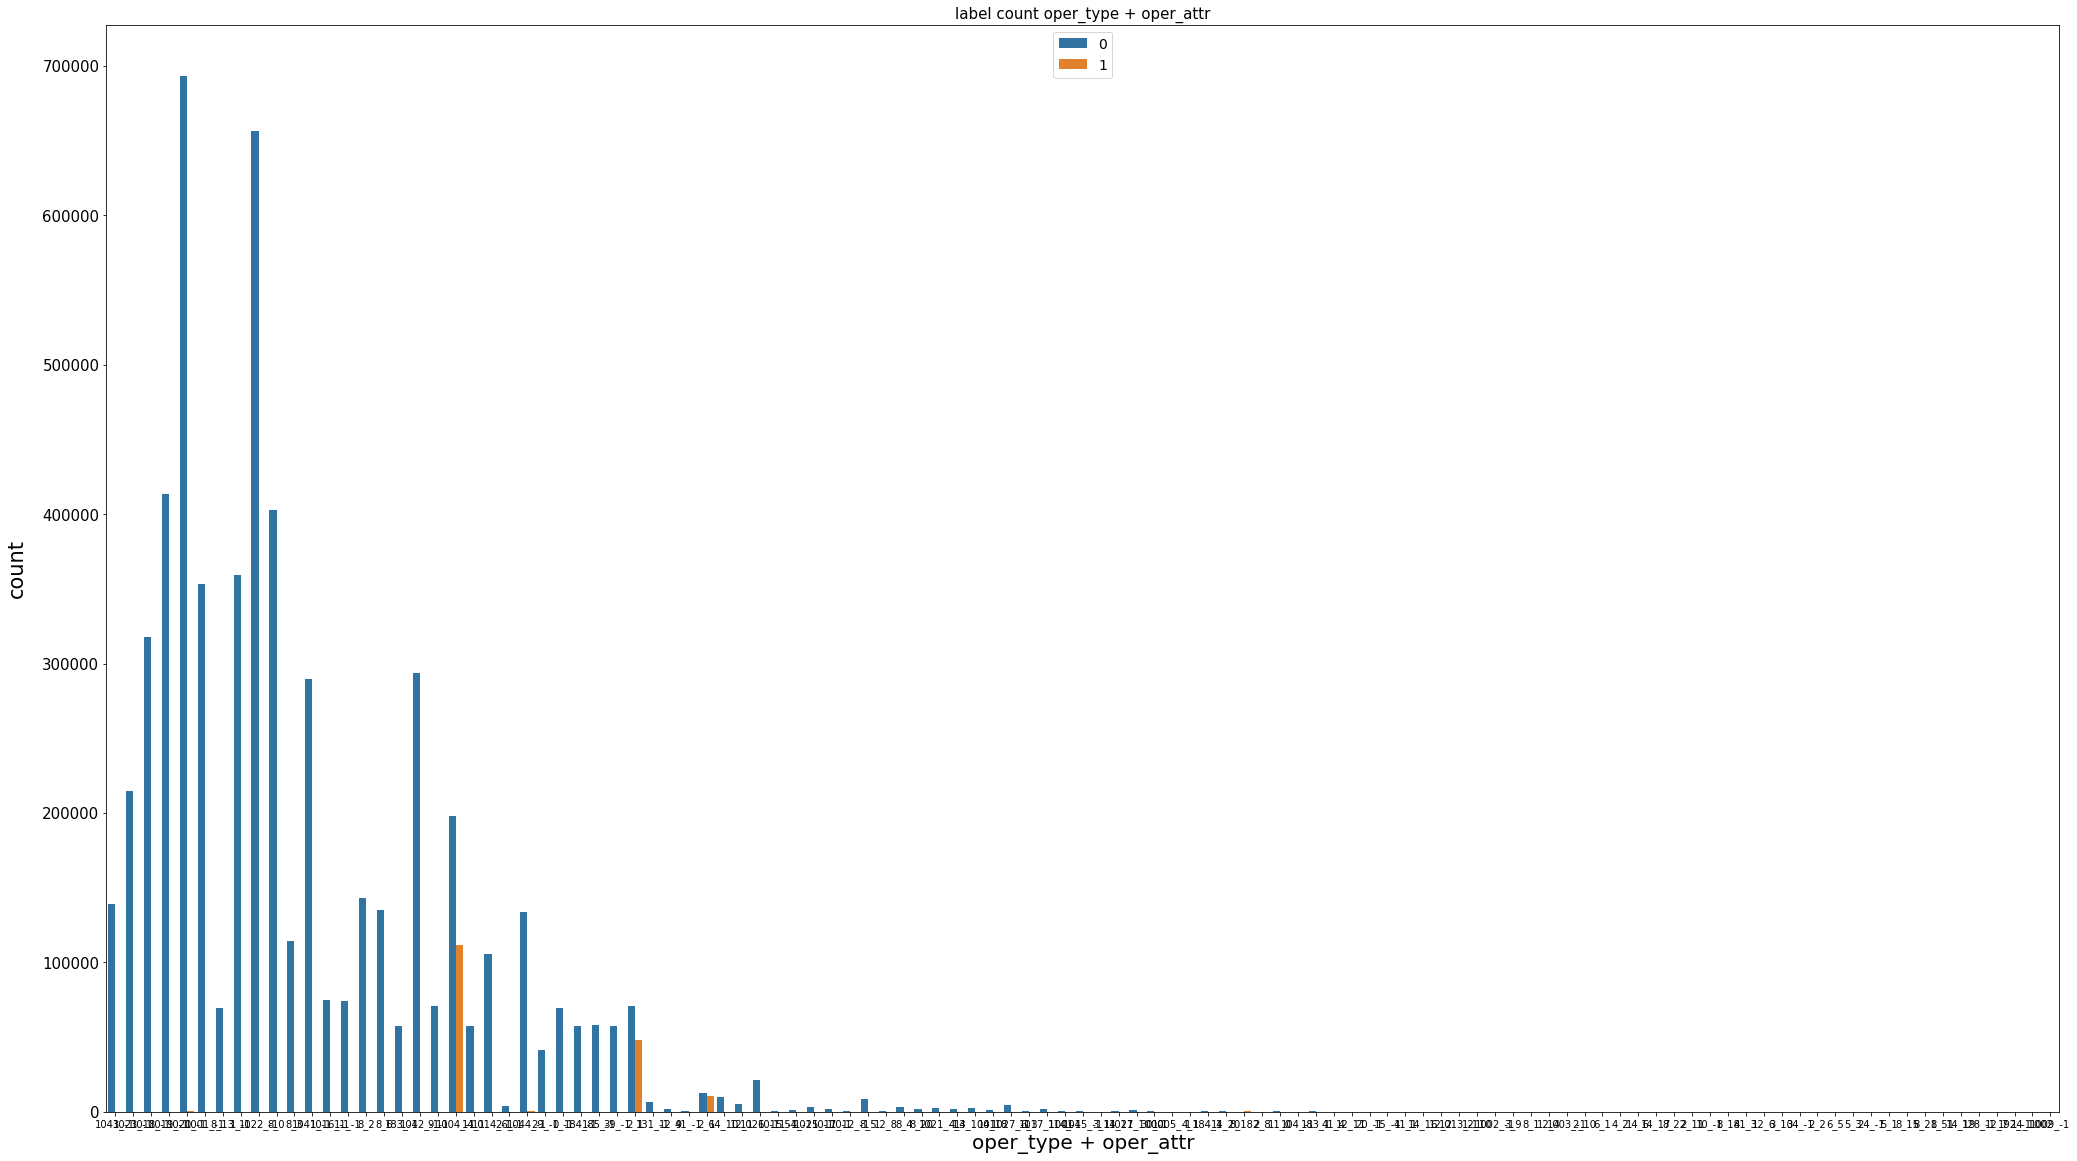

1020_-1    693154
1022_-1    656597
1019_-1    413710
8_0        402877
1_-1       359402
            ...  
12_7            1
128_-1          1
2_11            1
5_3             1
14_1002         1
Name: oper_type + oper_attr, Length: 109, dtype: int64


In [6]:
cat_plot('oper_type + oper_attr')

In [7]:
def data_preprocess(text):
    return re.sub(r"[^0-9^]",'',str(text))

In [8]:
def text_preprocess(text):
    text = text.strip()
    text = text.lower()
    text = wnl.lemmatize(text)
    text = remove_stopwords(text)
    text=re.sub(r"[^A-Za-z]"," ",text).lower()  
    return text

In [9]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
wnl = WordNetLemmatizer()

In [10]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [11]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [12]:
def transform(df):
    df['oper_1'] = df['oper_type + oper_attr'].apply(lambda x: 1 if x=='1004_-1'else 0)
    df['oper_2'] = df['oper_type + oper_attr'].apply(lambda x: 1 if x=='2_1' else 0)
    df['oper_3'] = df['oper_type + oper_attr'].apply(lambda x: 1 if x=='2_6' else 0)
    df['oper_4'] = df['oper_type + oper_attr'].apply(lambda x: 1 if x=='1044_-1'else 0)
    df['oper_5'] = df['oper_type + oper_attr'].apply(lambda x: 1 if x=='1020_-1' else 0)
    df['oper_6'] = df['oper_type + oper_attr'].apply(lambda x: 1 if x=='8_182' else 0)
    df['oper_7'] = df['oper_type + oper_attr'].apply(lambda x: 1 if x=='1004_-1'else 0)
    df['oper_8'] = df['oper_type + oper_attr'].apply(lambda x: 1 if x=='41_-1' else 0)
    df['oper_9'] = df['oper_type + oper_attr'].apply(lambda x: 1 if x=='2_8' else 0)
    df['oper_10'] = df['oper_type + oper_attr'].apply(lambda x: 1 if x=='41_1' else 0)
   
    df['index_oper_1']=df['index_oper'].apply(data_preprocess)
    df["index_oper_1"]=enc.fit_transform(np.array(df["index_oper_1"]).reshape(-1, 1)).astype(int)
    df[['oper_type', 'oper_attr']] = df['oper_type + oper_attr'].str.split('_', expand=True).astype('int')
  
    df['mailctg']=df['mailctg'].replace(-1,2)

    df['name_mfi_clean']=df['name_mfi'].apply(text_preprocess)
    df['phone_case'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='phone case'else 0)
    df['screen_protectors'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='screen protectors' else 0)
    df['mobile_phone_bags_cases'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='mobile phone bags   cases' else 0)
    df['necklace'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='necklace'else 0)
    df['ring'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='ring' else 0)
    df['stickers_decals'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='stickers decals' else 0)
    df['mobile_phone_cases_covers'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='mobile phone cases   covers' else 0)
    df['sunglass'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='sunglass' else 0)
    df['bra'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='bra' else 0)
    df['earring'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='earring' else 0)
                                                                 
    df['screen_protector'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='screen protector'else 0)
    df['cable'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='cable' else 0)
    df['car_decoration'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='car decoration' else 0)
    df['t_shirt'] = df['name_mfi_clean'].apply(lambda x: 1 if x=='t shirt ' else 0)
    df["name_mfi_clean"]=enc.fit_transform(np.array(df["name_mfi_clean"]).reshape(-1, 1)).astype(int)
    df = pd.get_dummies(df, columns=['type','is_privatecategory','is_return','is_in_yandex'])
    df['new']=df['total_qty_over_index_and_type']/df['total_qty_over_index']
    df[['dist_qty_oper_login_1','total_qty_oper_login_1','total_qty_oper_login_0','total_qty_over_index_and_type','total_qty_over_index']]=scaler.fit_transform(df[['dist_qty_oper_login_1','total_qty_oper_login_1','total_qty_oper_login_0','total_qty_over_index_and_type','total_qty_over_index']])
    

    return df.drop(['name_mfi','index_oper','oper_type + oper_attr'],axis=1)

In [13]:
train_final=transform(train)

In [14]:
test_final=transform(test)

In [15]:
train_final=train_final.fillna(0)
test_final=test_final.fillna(0)

In [16]:
train_final['label']=train_final['label'].astype('int32')

In [17]:
X=train_final.drop(['id','label','mailrank'],axis=1)
X_val=test_final.drop(['id','mailrank'],axis=1)
y=train_final.label.values

In [18]:
%%time
import os, gc,scipy.sparse
from lightgbm import LGBMClassifier

X = scipy.sparse.csr_matrix(X.values)
gc.collect()

X_val = scipy.sparse.csr_matrix(X_val.values)
gc.collect()


CPU times: total: 25.5 s
Wall time: 52.6 s


0

In [19]:
def run(trial, data=X,target=y):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
   
    
    params = {  'n_estimators': trial.suggest_int('n_estimators', 200, 2300),
                'max_depth': trial.suggest_int('max_depth', 8, 25),
                'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.1),
                'subsample': trial.suggest_uniform('subsample', 0.50, 1),
                 'gamma':trial.suggest_uniform('gamma', 0.50, 10),
                'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.50, 1),
                'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 100),
                'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
                
              
                
            }
    model = LGBMClassifier(**params,n_jobs=-1)
    model.fit(X_train, y_train,
           eval_set=[(X_train, y_train),(X_valid, y_valid)],
              early_stopping_rounds=50, verbose=50
              
          )
    y_proba = model.predict(X_valid)
    test_score =(0.1*recall_score(y_valid, y_proba, average="macro")+0.9*roc_auc_score(y_valid, y_proba, multi_class='ovo'))
    
    return test_score

In [20]:
study = optuna.create_study(direction='maximize')
study.optimize(run, n_trials=20)

[I 2022-11-19 12:07:47,125] A new study created in memory with name: no-name-47d9e2a2-96df-42e9-b322-0715a08a8db2


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0568445	valid_1's binary_logloss: 0.0569469
[100]	training's binary_logloss: 0.0456852	valid_1's binary_logloss: 0.0456986
[150]	training's binary_logloss: 0.0416189	valid_1's binary_logloss: 0.0416614
[200]	training's binary_logloss: 0.0400533	valid_1's binary_logloss: 0.0401248
[250]	training's binary_logloss: 0.0393464	valid_1's binary_logloss: 0.0394374
[300]	training's binary_logloss: 0.0389341	valid_1's binary_logloss: 0.0390482
[350]	training's binary_logloss: 0.0387326	valid_1's binary_logloss: 0.038865
[400]	training's binary_logloss: 0.0385636	valid_1's binary_logloss: 0.0387139
[450]	training's binary_logloss: 0.038434	valid_1's binary_logloss: 0.0386008
[500]	training's binary_logloss: 0.0383033	valid_1's binary_logloss: 0.0384918
[550]	training's binary_logloss: 0.0381908	valid_1's binary_logloss: 0.0383968
[600]	training's binary_logloss: 0.0380991	valid_1's binary_logloss: 0.03

[I 2022-11-19 12:17:11,166] Trial 0 finished with value: 0.794966338823114 and parameters: {'n_estimators': 2050, 'max_depth': 15, 'learning_rate': 0.016613655511629025, 'subsample': 0.8310607390505917, 'gamma': 3.297749988454436, 'colsample_bytree': 0.9794284880045903, 'reg_lambda': 3.9487918620149496, 'reg_alpha': 0.6376325804282014}. Best is trial 0 with value: 0.794966338823114.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0434664	valid_1's binary_logloss: 0.043517
[100]	training's binary_logloss: 0.0395538	valid_1's binary_logloss: 0.0396649
[150]	training's binary_logloss: 0.0388568	valid_1's binary_logloss: 0.0390091
[200]	training's binary_logloss: 0.0385308	valid_1's binary_logloss: 0.0387256
[250]	training's binary_logloss: 0.0382617	valid_1's binary_logloss: 0.0384998
[300]	training's binary_logloss: 0.0380279	valid_1's binary_logloss: 0.0382987
[350]	training's binary_logloss: 0.0378162	valid_1's binary_logloss: 0.038124
[400]	training's binary_logloss: 0.0376336	valid_1's binary_logloss: 0.0379787
[450]	training's binary_logloss: 0.0374873	valid_1's binary_logloss: 0.0378659
[500]	training's binary_logloss: 0.0373695	valid_1's binary_logloss: 0.0377861
[550]	training's binary_logloss: 0.0372665	valid_1's binary_logloss: 0.0377164
[600]	training's binary_logloss: 0.0371672	valid_1's binary_logloss: 0.03

[I 2022-11-19 12:23:06,105] Trial 1 finished with value: 0.8016363635913833 and parameters: {'n_estimators': 1529, 'max_depth': 9, 'learning_rate': 0.041015136335048184, 'subsample': 0.7761210466959245, 'gamma': 7.851881566879623, 'colsample_bytree': 0.7596182870406583, 'reg_lambda': 6.640403148560402, 'reg_alpha': 0.0025304064415770217}. Best is trial 1 with value: 0.8016363635913833.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.039523	valid_1's binary_logloss: 0.0396019
[100]	training's binary_logloss: 0.0383135	valid_1's binary_logloss: 0.0384778
[150]	training's binary_logloss: 0.0378873	valid_1's binary_logloss: 0.0381525
[200]	training's binary_logloss: 0.0375802	valid_1's binary_logloss: 0.0379417
[250]	training's binary_logloss: 0.0373203	valid_1's binary_logloss: 0.0377897
Did not meet early stopping. Best iteration is:
[288]	training's binary_logloss: 0.0370879	valid_1's binary_logloss: 0.0376377


[I 2022-11-19 12:24:22,777] Trial 2 finished with value: 0.7885589237341505 and parameters: {'n_estimators': 288, 'max_depth': 20, 'learning_rate': 0.07474378024655937, 'subsample': 0.9631337360238845, 'gamma': 1.5343835056636808, 'colsample_bytree': 0.7242611765735234, 'reg_lambda': 0.06132760184935423, 'reg_alpha': 0.22718640385217173}. Best is trial 1 with value: 0.8016363635913833.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0400824	valid_1's binary_logloss: 0.0401867
[100]	training's binary_logloss: 0.0389082	valid_1's binary_logloss: 0.0390793
[150]	training's binary_logloss: 0.0383085	valid_1's binary_logloss: 0.0385544
[200]	training's binary_logloss: 0.0379165	valid_1's binary_logloss: 0.0382375
[250]	training's binary_logloss: 0.0375824	valid_1's binary_logloss: 0.0379614
Did not meet early stopping. Best iteration is:
[252]	training's binary_logloss: 0.0375733	valid_1's binary_logloss: 0.0379552


[I 2022-11-19 12:25:42,118] Trial 3 finished with value: 0.7897376371130245 and parameters: {'n_estimators': 252, 'max_depth': 8, 'learning_rate': 0.07715772853726612, 'subsample': 0.657734293926602, 'gamma': 4.7235558528274995, 'colsample_bytree': 0.7857847415176601, 'reg_lambda': 4.8078886355401265, 'reg_alpha': 0.02597737632669436}. Best is trial 1 with value: 0.8016363635913833.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0394648	valid_1's binary_logloss: 0.0395701
[100]	training's binary_logloss: 0.0384012	valid_1's binary_logloss: 0.0385833
[150]	training's binary_logloss: 0.0379129	valid_1's binary_logloss: 0.038176
[200]	training's binary_logloss: 0.0375416	valid_1's binary_logloss: 0.037898
[250]	training's binary_logloss: 0.0372437	valid_1's binary_logloss: 0.0376826
[300]	training's binary_logloss: 0.0369983	valid_1's binary_logloss: 0.0375245
[350]	training's binary_logloss: 0.0368027	valid_1's binary_logloss: 0.0374174
[400]	training's binary_logloss: 0.0366116	valid_1's binary_logloss: 0.0373267
[450]	training's binary_logloss: 0.036447	valid_1's binary_logloss: 0.0372535
[500]	training's binary_logloss: 0.0362823	valid_1's binary_logloss: 0.0371723
[550]	training's binary_logloss: 0.0361189	valid_1's binary_logloss: 0.0371023
[600]	training's binary_logloss: 0.035976	valid_1's binary_logloss: 0.0370

[I 2022-11-19 12:30:02,841] Trial 4 finished with value: 0.8085043058876881 and parameters: {'n_estimators': 1333, 'max_depth': 15, 'learning_rate': 0.07774680759655861, 'subsample': 0.6477689976683698, 'gamma': 0.5365331907839794, 'colsample_bytree': 0.7341048929728271, 'reg_lambda': 0.0634772262032428, 'reg_alpha': 1.5483397854440069}. Best is trial 4 with value: 0.8085043058876881.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0489674	valid_1's binary_logloss: 0.0490338
[100]	training's binary_logloss: 0.0414181	valid_1's binary_logloss: 0.0414649
[150]	training's binary_logloss: 0.0396826	valid_1's binary_logloss: 0.0397705
[200]	training's binary_logloss: 0.0391103	valid_1's binary_logloss: 0.0392257
[250]	training's binary_logloss: 0.0388015	valid_1's binary_logloss: 0.0389418
[300]	training's binary_logloss: 0.0385776	valid_1's binary_logloss: 0.0387427
[350]	training's binary_logloss: 0.0383742	valid_1's binary_logloss: 0.0385671
[400]	training's binary_logloss: 0.0382139	valid_1's binary_logloss: 0.0384282
[450]	training's binary_logloss: 0.0380757	valid_1's binary_logloss: 0.038311
[500]	training's binary_logloss: 0.0379553	valid_1's binary_logloss: 0.0382081
[550]	training's binary_logloss: 0.0378133	valid_1's binary_logloss: 0.0380839
[600]	training's binary_logloss: 0.0377073	valid_1's binary_logloss: 0.0

[I 2022-11-19 12:37:47,749] Trial 5 finished with value: 0.7979245554697509 and parameters: {'n_estimators': 1630, 'max_depth': 24, 'learning_rate': 0.027677997765094678, 'subsample': 0.6853040375007473, 'gamma': 9.549083349781398, 'colsample_bytree': 0.8412932599923706, 'reg_lambda': 31.131034864570985, 'reg_alpha': 0.37059487187948303}. Best is trial 4 with value: 0.8085043058876881.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0402792	valid_1's binary_logloss: 0.0403442
[100]	training's binary_logloss: 0.0388761	valid_1's binary_logloss: 0.0390266
[150]	training's binary_logloss: 0.0382938	valid_1's binary_logloss: 0.0384925
[200]	training's binary_logloss: 0.0379604	valid_1's binary_logloss: 0.0382117
[250]	training's binary_logloss: 0.0377317	valid_1's binary_logloss: 0.0380321
[300]	training's binary_logloss: 0.0375329	valid_1's binary_logloss: 0.0378768
[350]	training's binary_logloss: 0.0374014	valid_1's binary_logloss: 0.0377915
[400]	training's binary_logloss: 0.0373055	valid_1's binary_logloss: 0.0377348
[450]	training's binary_logloss: 0.0372212	valid_1's binary_logloss: 0.0376882
[500]	training's binary_logloss: 0.0371335	valid_1's binary_logloss: 0.0376384
[550]	training's binary_logloss: 0.037053	valid_1's binary_logloss: 0.0375941
[600]	training's binary_logloss: 0.036985	valid_1's binary_logloss: 0.03

[I 2022-11-19 12:41:02,484] Trial 6 finished with value: 0.8043969948150945 and parameters: {'n_estimators': 747, 'max_depth': 18, 'learning_rate': 0.08146987468860696, 'subsample': 0.8793868912559479, 'gamma': 8.27807590452193, 'colsample_bytree': 0.6169033030255547, 'reg_lambda': 40.10251587688839, 'reg_alpha': 25.618339853338956}. Best is trial 4 with value: 0.8085043058876881.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.039535	valid_1's binary_logloss: 0.0396144
[100]	training's binary_logloss: 0.0383232	valid_1's binary_logloss: 0.0384852
[150]	training's binary_logloss: 0.0378762	valid_1's binary_logloss: 0.0381429
[200]	training's binary_logloss: 0.0375216	valid_1's binary_logloss: 0.0378824
[250]	training's binary_logloss: 0.0372467	valid_1's binary_logloss: 0.0376955
[300]	training's binary_logloss: 0.0370162	valid_1's binary_logloss: 0.0375563
[350]	training's binary_logloss: 0.0368393	valid_1's binary_logloss: 0.0374699
[400]	training's binary_logloss: 0.0366812	valid_1's binary_logloss: 0.0374005
[450]	training's binary_logloss: 0.0365176	valid_1's binary_logloss: 0.0373274
[500]	training's binary_logloss: 0.0363642	valid_1's binary_logloss: 0.0372679
[550]	training's binary_logloss: 0.0362313	valid_1's binary_logloss: 0.0372218
Did not meet early stopping. Best iteration is:
[562]	training's binary_

[I 2022-11-19 12:43:05,620] Trial 7 finished with value: 0.7958681104004648 and parameters: {'n_estimators': 562, 'max_depth': 20, 'learning_rate': 0.07950862744759335, 'subsample': 0.8359060110221372, 'gamma': 2.300641634058907, 'colsample_bytree': 0.5172020576037009, 'reg_lambda': 0.5473470761929455, 'reg_alpha': 0.0053536446895958495}. Best is trial 4 with value: 0.8085043058876881.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0416247	valid_1's binary_logloss: 0.0416704
[100]	training's binary_logloss: 0.0388494	valid_1's binary_logloss: 0.0389499
[150]	training's binary_logloss: 0.0383388	valid_1's binary_logloss: 0.038492
[200]	training's binary_logloss: 0.0380365	valid_1's binary_logloss: 0.0382495
[250]	training's binary_logloss: 0.0378324	valid_1's binary_logloss: 0.0381108
[300]	training's binary_logloss: 0.0376598	valid_1's binary_logloss: 0.0380056
[350]	training's binary_logloss: 0.0374572	valid_1's binary_logloss: 0.0378644
[400]	training's binary_logloss: 0.0372486	valid_1's binary_logloss: 0.0377196
[450]	training's binary_logloss: 0.0370779	valid_1's binary_logloss: 0.037612
[500]	training's binary_logloss: 0.0369327	valid_1's binary_logloss: 0.0375261
[550]	training's binary_logloss: 0.0368127	valid_1's binary_logloss: 0.0374676
[600]	training's binary_logloss: 0.0366987	valid_1's binary_logloss: 0.03

[I 2022-11-19 12:46:45,996] Trial 8 finished with value: 0.7982381700217784 and parameters: {'n_estimators': 961, 'max_depth': 13, 'learning_rate': 0.0480034834179665, 'subsample': 0.7710064204127743, 'gamma': 5.359140142364785, 'colsample_bytree': 0.9490549091850935, 'reg_lambda': 0.23916186284424096, 'reg_alpha': 0.48021437325519245}. Best is trial 4 with value: 0.8085043058876881.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0492809	valid_1's binary_logloss: 0.0493257
[100]	training's binary_logloss: 0.0415092	valid_1's binary_logloss: 0.0415447
[150]	training's binary_logloss: 0.0396343	valid_1's binary_logloss: 0.0397054
[200]	training's binary_logloss: 0.038977	valid_1's binary_logloss: 0.039072
[250]	training's binary_logloss: 0.0386887	valid_1's binary_logloss: 0.0388149
[300]	training's binary_logloss: 0.0384986	valid_1's binary_logloss: 0.0386482
[350]	training's binary_logloss: 0.038318	valid_1's binary_logloss: 0.0384958
Did not meet early stopping. Best iteration is:
[354]	training's binary_logloss: 0.0383081	valid_1's binary_logloss: 0.0384888


[I 2022-11-19 12:48:45,852] Trial 9 finished with value: 0.7837345777377611 and parameters: {'n_estimators': 354, 'max_depth': 20, 'learning_rate': 0.02583938098286806, 'subsample': 0.7423369077773124, 'gamma': 8.405189227972805, 'colsample_bytree': 0.9663269478776286, 'reg_lambda': 15.237675027167288, 'reg_alpha': 3.4428956677012934}. Best is trial 4 with value: 0.8085043058876881.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0396689	valid_1's binary_logloss: 0.0397472
[100]	training's binary_logloss: 0.038784	valid_1's binary_logloss: 0.0389297
[150]	training's binary_logloss: 0.0384707	valid_1's binary_logloss: 0.0386666
[200]	training's binary_logloss: 0.0382265	valid_1's binary_logloss: 0.0384549
[250]	training's binary_logloss: 0.0380954	valid_1's binary_logloss: 0.0383555
[300]	training's binary_logloss: 0.0380403	valid_1's binary_logloss: 0.0383192
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.0380403	valid_1's binary_logloss: 0.0383192


[I 2022-11-19 12:50:15,287] Trial 10 finished with value: 0.7896214724180671 and parameters: {'n_estimators': 2293, 'max_depth': 12, 'learning_rate': 0.09478329629854557, 'subsample': 0.5426967525647004, 'gamma': 0.7778255698465637, 'colsample_bytree': 0.6484055093979362, 'reg_lambda': 0.0015258849180202203, 'reg_alpha': 72.96064560454919}. Best is trial 4 with value: 0.8085043058876881.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0407509	valid_1's binary_logloss: 0.040808
[100]	training's binary_logloss: 0.0388871	valid_1's binary_logloss: 0.0390138
[150]	training's binary_logloss: 0.0383956	valid_1's binary_logloss: 0.0385703
[200]	training's binary_logloss: 0.0380744	valid_1's binary_logloss: 0.0382933
[250]	training's binary_logloss: 0.0378634	valid_1's binary_logloss: 0.0381234
[300]	training's binary_logloss: 0.0376936	valid_1's binary_logloss: 0.0379905
[350]	training's binary_logloss: 0.0375705	valid_1's binary_logloss: 0.0379007
[400]	training's binary_logloss: 0.0374777	valid_1's binary_logloss: 0.0378437
[450]	training's binary_logloss: 0.0373772	valid_1's binary_logloss: 0.0377748
[500]	training's binary_logloss: 0.037293	valid_1's binary_logloss: 0.0377217
[550]	training's binary_logloss: 0.0372233	valid_1's binary_logloss: 0.0376852
[600]	training's binary_logloss: 0.0371538	valid_1's binary_logloss: 0.03

[I 2022-11-19 12:54:22,642] Trial 11 finished with value: 0.8042997421192575 and parameters: {'n_estimators': 984, 'max_depth': 17, 'learning_rate': 0.0647587223220184, 'subsample': 0.9630367423957434, 'gamma': 6.506206208652928, 'colsample_bytree': 0.6066279576713862, 'reg_lambda': 0.018094381586123167, 'reg_alpha': 30.794879751092385}. Best is trial 4 with value: 0.8085043058876881.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0392296	valid_1's binary_logloss: 0.0393578
[100]	training's binary_logloss: 0.0382642	valid_1's binary_logloss: 0.038483
[150]	training's binary_logloss: 0.0378063	valid_1's binary_logloss: 0.0381044
[200]	training's binary_logloss: 0.0374848	valid_1's binary_logloss: 0.0378579
[250]	training's binary_logloss: 0.0372567	valid_1's binary_logloss: 0.0377197
[300]	training's binary_logloss: 0.0370461	valid_1's binary_logloss: 0.0375915
[350]	training's binary_logloss: 0.0368426	valid_1's binary_logloss: 0.0374713
[400]	training's binary_logloss: 0.0366706	valid_1's binary_logloss: 0.0373801
[450]	training's binary_logloss: 0.0365166	valid_1's binary_logloss: 0.0372966
[500]	training's binary_logloss: 0.0363723	valid_1's binary_logloss: 0.0372217
[550]	training's binary_logloss: 0.0362311	valid_1's binary_logloss: 0.0371558
[600]	training's binary_logloss: 0.0360961	valid_1's binary_logloss: 0.0

[I 2022-11-19 12:57:29,575] Trial 12 finished with value: 0.8075314274576575 and parameters: {'n_estimators': 837, 'max_depth': 17, 'learning_rate': 0.08865073796128231, 'subsample': 0.5538412595377747, 'gamma': 3.835029847857003, 'colsample_bytree': 0.6450933264501474, 'reg_lambda': 0.0037097388324534306, 'reg_alpha': 7.739161998085814}. Best is trial 4 with value: 0.8085043058876881.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0389408	valid_1's binary_logloss: 0.0390252
[100]	training's binary_logloss: 0.0380539	valid_1's binary_logloss: 0.0382401
[150]	training's binary_logloss: 0.0376008	valid_1's binary_logloss: 0.0378948
[200]	training's binary_logloss: 0.0372626	valid_1's binary_logloss: 0.0376474
[250]	training's binary_logloss: 0.0369942	valid_1's binary_logloss: 0.0374801
[300]	training's binary_logloss: 0.036786	valid_1's binary_logloss: 0.0373666
[350]	training's binary_logloss: 0.0365915	valid_1's binary_logloss: 0.0372712
[400]	training's binary_logloss: 0.0363943	valid_1's binary_logloss: 0.0371708
[450]	training's binary_logloss: 0.0361988	valid_1's binary_logloss: 0.0370685
[500]	training's binary_logloss: 0.0360516	valid_1's binary_logloss: 0.0370123
[550]	training's binary_logloss: 0.0359086	valid_1's binary_logloss: 0.0369631
[600]	training's binary_logloss: 0.0357854	valid_1's binary_logloss: 0.0

[I 2022-11-19 13:02:20,751] Trial 13 finished with value: 0.8146885348477381 and parameters: {'n_estimators': 1450, 'max_depth': 14, 'learning_rate': 0.09937348742875292, 'subsample': 0.515447099150123, 'gamma': 3.452904221905099, 'colsample_bytree': 0.6790609830089311, 'reg_lambda': 0.0021087660336244966, 'reg_alpha': 5.304402844068736}. Best is trial 13 with value: 0.8146885348477381.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0395282	valid_1's binary_logloss: 0.0395401
[100]	training's binary_logloss: 0.0386318	valid_1's binary_logloss: 0.0389907
[150]	training's binary_logloss: 0.0380683	valid_1's binary_logloss: 0.0385058
[200]	training's binary_logloss: 0.0376322	valid_1's binary_logloss: 0.038191
[250]	training's binary_logloss: 0.0373002	valid_1's binary_logloss: 0.0379843
[300]	training's binary_logloss: 0.0370797	valid_1's binary_logloss: 0.0378767
[350]	training's binary_logloss: 0.0368238	valid_1's binary_logloss: 0.0377269
[400]	training's binary_logloss: 0.0365908	valid_1's binary_logloss: 0.037618
[450]	training's binary_logloss: 0.0363796	valid_1's binary_logloss: 0.0375135
[500]	training's binary_logloss: 0.0362586	valid_1's binary_logloss: 0.037514
[550]	training's binary_logloss: 0.0360225	valid_1's binary_logloss: 0.0373994
[600]	training's binary_logloss: 0.0359322	valid_1's binary_logloss: 0.037

[I 2022-11-19 13:07:02,250] Trial 14 finished with value: 0.8146491112973461 and parameters: {'n_estimators': 1403, 'max_depth': 12, 'learning_rate': 0.09952371713321805, 'subsample': 0.5001262760419048, 'gamma': 2.56209938750811, 'colsample_bytree': 0.8908470816584999, 'reg_lambda': 0.010184392161468622, 'reg_alpha': 2.730813080049377}. Best is trial 13 with value: 0.8146885348477381.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0398214	valid_1's binary_logloss: 0.0396848
[100]	training's binary_logloss: 0.0384766	valid_1's binary_logloss: 0.0389154
[150]	training's binary_logloss: 0.0379018	valid_1's binary_logloss: 0.0385677
[200]	training's binary_logloss: 0.0374872	valid_1's binary_logloss: 0.0383501
[250]	training's binary_logloss: 0.0371782	valid_1's binary_logloss: 0.0382025
[300]	training's binary_logloss: 0.0368836	valid_1's binary_logloss: 0.0380687
[350]	training's binary_logloss: 0.0366291	valid_1's binary_logloss: 0.037964
[400]	training's binary_logloss: 0.0364148	valid_1's binary_logloss: 0.0379213
[450]	training's binary_logloss: 0.0361748	valid_1's binary_logloss: 0.0378114
[500]	training's binary_logloss: 0.0359473	valid_1's binary_logloss: 0.0377254
[550]	training's binary_logloss: 0.0357318	valid_1's binary_logloss: 0.0376438
[600]	training's binary_logloss: 0.0355502	valid_1's binary_logloss: 0.0

[I 2022-11-19 13:11:57,233] Trial 15 finished with value: 0.8103838707508285 and parameters: {'n_estimators': 1744, 'max_depth': 11, 'learning_rate': 0.09992025100544531, 'subsample': 0.5013448288117416, 'gamma': 2.872524620454883, 'colsample_bytree': 0.8847757555966261, 'reg_lambda': 0.007189362158743402, 'reg_alpha': 0.04899872460415224}. Best is trial 13 with value: 0.8146885348477381.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0405302	valid_1's binary_logloss: 0.0405907
[100]	training's binary_logloss: 0.0387526	valid_1's binary_logloss: 0.0388838
[150]	training's binary_logloss: 0.0382871	valid_1's binary_logloss: 0.0384771
[200]	training's binary_logloss: 0.0378991	valid_1's binary_logloss: 0.0381378
[250]	training's binary_logloss: 0.0376374	valid_1's binary_logloss: 0.0379281
[300]	training's binary_logloss: 0.0374435	valid_1's binary_logloss: 0.0377899
[350]	training's binary_logloss: 0.0372395	valid_1's binary_logloss: 0.0376425
[400]	training's binary_logloss: 0.0370774	valid_1's binary_logloss: 0.0375344
[450]	training's binary_logloss: 0.0369429	valid_1's binary_logloss: 0.0374573
[500]	training's binary_logloss: 0.0368219	valid_1's binary_logloss: 0.0373978
[550]	training's binary_logloss: 0.0366774	valid_1's binary_logloss: 0.0373046
[600]	training's binary_logloss: 0.036546	valid_1's binary_logloss: 0.0

[I 2022-11-19 13:16:38,486] Trial 16 finished with value: 0.8081752495725547 and parameters: {'n_estimators': 1260, 'max_depth': 10, 'learning_rate': 0.060539908664290085, 'subsample': 0.5922515310971559, 'gamma': 4.715984662980571, 'colsample_bytree': 0.8663369948207973, 'reg_lambda': 0.0012199013462996901, 'reg_alpha': 7.452134438260566}. Best is trial 13 with value: 0.8146885348477381.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0395051	valid_1's binary_logloss: 0.0397388
[100]	training's binary_logloss: 0.0384391	valid_1's binary_logloss: 0.0388454
[150]	training's binary_logloss: 0.0379336	valid_1's binary_logloss: 0.0384736
[200]	training's binary_logloss: 0.0375648	valid_1's binary_logloss: 0.0382622
[250]	training's binary_logloss: 0.0372528	valid_1's binary_logloss: 0.0380757
[300]	training's binary_logloss: 0.0369857	valid_1's binary_logloss: 0.0379294
[350]	training's binary_logloss: 0.0367343	valid_1's binary_logloss: 0.0377893
[400]	training's binary_logloss: 0.0365444	valid_1's binary_logloss: 0.0377084
[450]	training's binary_logloss: 0.0363567	valid_1's binary_logloss: 0.0376223
[500]	training's binary_logloss: 0.0361765	valid_1's binary_logloss: 0.0375632
[550]	training's binary_logloss: 0.0359793	valid_1's binary_logloss: 0.0374776
[600]	training's binary_logloss: 0.0358375	valid_1's binary_logloss: 0.

[I 2022-11-19 13:21:34,896] Trial 17 finished with value: 0.8106007196445354 and parameters: {'n_estimators': 1892, 'max_depth': 14, 'learning_rate': 0.09094932916649066, 'subsample': 0.5938025371900656, 'gamma': 2.1663190893453397, 'colsample_bytree': 0.5200351096594626, 'reg_lambda': 0.016323485912300352, 'reg_alpha': 0.10297058229498338}. Best is trial 13 with value: 0.8146885348477381.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0399524	valid_1's binary_logloss: 0.0400021
[100]	training's binary_logloss: 0.0384582	valid_1's binary_logloss: 0.0385648
[150]	training's binary_logloss: 0.0380197	valid_1's binary_logloss: 0.0382065
[200]	training's binary_logloss: 0.0377235	valid_1's binary_logloss: 0.0379954
[250]	training's binary_logloss: 0.0374486	valid_1's binary_logloss: 0.037802
[300]	training's binary_logloss: 0.0372486	valid_1's binary_logloss: 0.0376798
[350]	training's binary_logloss: 0.0370644	valid_1's binary_logloss: 0.0375743
[400]	training's binary_logloss: 0.0368943	valid_1's binary_logloss: 0.0374812
[450]	training's binary_logloss: 0.0367454	valid_1's binary_logloss: 0.0374112
[500]	training's binary_logloss: 0.0365781	valid_1's binary_logloss: 0.0373158
[550]	training's binary_logloss: 0.0364359	valid_1's binary_logloss: 0.0372471
[600]	training's binary_logloss: 0.0362956	valid_1's binary_logloss: 0.0

[I 2022-11-19 13:26:06,461] Trial 18 finished with value: 0.8087108021730051 and parameters: {'n_estimators': 1402, 'max_depth': 25, 'learning_rate': 0.06708847586083239, 'subsample': 0.5015569801482915, 'gamma': 6.26278251708796, 'colsample_bytree': 0.6976658878478587, 'reg_lambda': 0.005536642768794351, 'reg_alpha': 2.153998038929884}. Best is trial 13 with value: 0.8146885348477381.


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0391304	valid_1's binary_logloss: 0.0392456
[100]	training's binary_logloss: 0.0382678	valid_1's binary_logloss: 0.0384823
[150]	training's binary_logloss: 0.0377446	valid_1's binary_logloss: 0.0380308
[200]	training's binary_logloss: 0.0374086	valid_1's binary_logloss: 0.0377689
[250]	training's binary_logloss: 0.0371739	valid_1's binary_logloss: 0.0376197
[300]	training's binary_logloss: 0.0369692	valid_1's binary_logloss: 0.0374901
[350]	training's binary_logloss: 0.0367933	valid_1's binary_logloss: 0.0373945
[400]	training's binary_logloss: 0.0366297	valid_1's binary_logloss: 0.037303
[450]	training's binary_logloss: 0.0364779	valid_1's binary_logloss: 0.0372221
[500]	training's binary_logloss: 0.0363503	valid_1's binary_logloss: 0.0371753
[550]	training's binary_logloss: 0.036231	valid_1's binary_logloss: 0.0371287
[600]	training's binary_logloss: 0.0361218	valid_1's binary_logloss: 0.03

[I 2022-11-19 13:30:22,211] Trial 19 finished with value: 0.8116732113655285 and parameters: {'n_estimators': 1148, 'max_depth': 12, 'learning_rate': 0.09793350652207489, 'subsample': 0.6046362891810694, 'gamma': 3.979007029080506, 'colsample_bytree': 0.820042856486105, 'reg_lambda': 0.05713107190158574, 'reg_alpha': 12.521798423609422}. Best is trial 13 with value: 0.8146885348477381.


In [21]:
study.best_params

{'n_estimators': 1450,
 'max_depth': 14,
 'learning_rate': 0.09937348742875292,
 'subsample': 0.515447099150123,
 'gamma': 3.452904221905099,
 'colsample_bytree': 0.6790609830089311,
 'reg_lambda': 0.0021087660336244966,
 'reg_alpha': 5.304402844068736}

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LGBMClassifier(n_estimators= 1450,max_depth= 14,learning_rate= 0.09937348742875292,subsample= 0.515447099150123,
                        gamma=3.452904221905099,colsample_bytree= 0.6790609830089311,reg_lambda= 0.0021087660336244966,
                        reg_alpha= 5.304402844068736)
model.fit(X_train, y_train,eval_set=[(X_train, y_train),(X_valid, y_valid)],
           early_stopping_rounds=50, verbose=50)
y_proba = model.predict(X_valid)

Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.0389408	valid_1's binary_logloss: 0.0390252
[100]	training's binary_logloss: 0.0380539	valid_1's binary_logloss: 0.0382401
[150]	training's binary_logloss: 0.0376008	valid_1's binary_logloss: 0.0378948
[200]	training's binary_logloss: 0.0372626	valid_1's binary_logloss: 0.0376474
[250]	training's binary_logloss: 0.0369942	valid_1's binary_logloss: 0.0374801
[300]	training's binary_logloss: 0.036786	valid_1's binary_logloss: 0.0373666
[350]	training's binary_logloss: 0.0365915	valid_1's binary_logloss: 0.0372712
[400]	training's binary_logloss: 0.0363943	valid_1's binary_logloss: 0.0371708
[450]	training's binary_logloss: 0.0361988	valid_1's binary_logloss: 0.0370685
[500]	training's binary_logloss: 0.0360516	valid_1's binary_logloss: 0.0370123
[550]	training's binary_logloss: 0.0359086	valid_1's binary_logloss: 0.0369631
[600]	training's binary_logloss: 0.0357854	valid_1's binary_logloss: 0.0

In [24]:
from sklearn.metrics import f1_score, precision_score, recall_score
print("Значение метрики Pochta на test: ", 0.1*recall_score(y_valid, y_proba, average="macro")+0.9*roc_auc_score(y_valid, y_proba, multi_class='ovo'))
print("Значение метрики F1 на test: ", f1_score(y_valid, y_proba))
print("Значение метрики Recall на test: ", recall_score(y_valid, y_proba, average="macro"))
print("Значение метрики Precision на test: ", precision_score(y_valid, y_proba)) 
print("Значение метрики  roc_auc на test: ", roc_auc_score(y_valid, y_proba)) 

Значение метрики Pochta на test:  0.8146885348477381
Значение метрики F1 на test:  0.6817976054821036
Значение метрики Recall на test:  0.814688534847738
Значение метрики Precision на test:  0.7345037500420408
Значение метрики  roc_auc на test:  0.8146885348477381


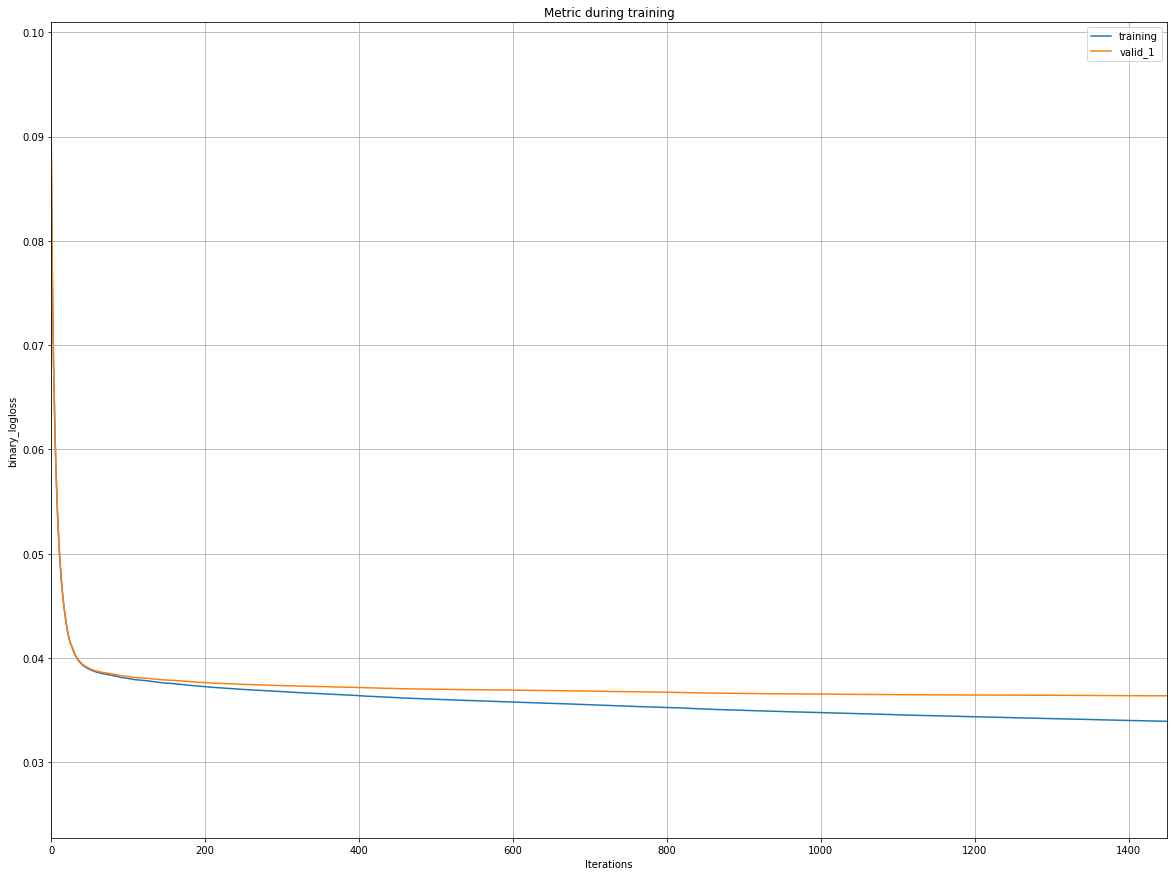

In [25]:
import lightgbm
lightgbm.plot_metric(model, figsize=(20, 15));

In [26]:
predict = model.predict(X_val)

In [27]:
test_final['label']=predict

In [28]:
test_final[['id','label']].to_csv("pochta_solution.csv", index=False, line_terminator='\r')

In [29]:
test_final['label'].value_counts()

0    3902748
1      97252
Name: label, dtype: int64